In [1]:
import sys
import numpy as np
import xarray as xr
import matplotlib.pylab as plt
from netCDF4 import Dataset
from matplotlib.colors import LogNorm
import cmocean
%matplotlib inline
%autosave 60


Autosaving every 60 seconds


In [2]:
eN60_WT_ke_jfm = xr.open_dataset('eNATL60-BLBT02_your_region_KE_w_k_spectrum_JFM.nc')
eN60_WT_ke_jas = xr.open_dataset('eNATL60-BLBT02_your_region_KE_w_k_spectrum_JAS.nc')


In [3]:
sec_to_hour = 3600.0
norm = LogNorm(vmin=1E-6,vmax=1E-2)
M2 = 0.080511 # Frequency of M2 internal tide

In [4]:
title = ['JFM (eN60-WT)','JAS (eN60-WT)']
index = ['(a)','(b)']

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


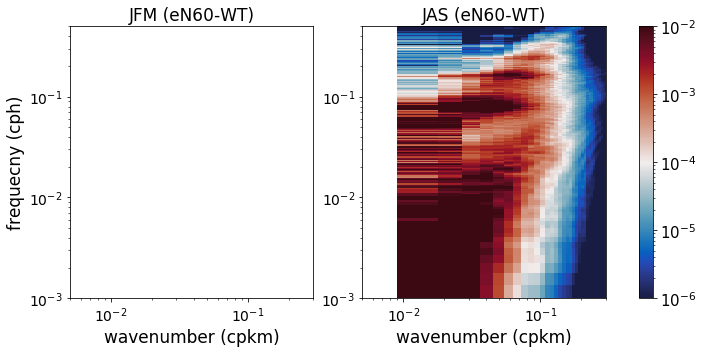

In [8]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
var = [eN60_WT_ke_jfm,eN60_WT_ke_jas]
cmap = cmocean.cm.balance
axs = axs.ravel()
for i in range(len(axs)):
    spec = var[i]
    ff = sec_to_hour*spec.frequency; ww = spec.wavenumber
    a0=axs[i].pcolormesh(ww,ff,spec.Ke_spectrum*ww*ff,norm=norm,cmap=cmap)
    axs[i].text(6E-3,3E-1,index[i],fontsize=15,color='w')
    axs[i].set_xscale("log"); 
    axs[i].set_yscale("log")
    axs[i].set_title(title[i],size=17)
    axs[i].set_xlabel('wavenumber (cpkm)',fontsize=17)
    if (i ==0): 
        axs[i].set_ylabel('frequecny (cph)',fontsize=17); 
    axs[i].set_xlim(spec.wavenumber.min(),spec.wavenumber.max())
    axs[i].set_ylim(1E-3,5E-1)
    axs[i].set_xlim(5E-3,3E-1)
    axs[i].tick_params(labelsize=14)
cb = plt.colorbar(a0,ax=axs.ravel().tolist())
cb.ax.tick_params(labelsize=15)
plt.savefig('eN60_KE_w_k_psd.png',dpi=300)